In [1]:
import os
import datetime as dt
from datetime import date
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from pprint import pprint
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from Antonis_scripts.generate_features import *
# from Antonis_scripts.Linear_Regression import *

pd.set_option('max_columns', 330)
pd.set_option('max_rows', 1000)

In [2]:
%matplotlib inline
# plt.style.use('ggplot')

# Load DataFrames

In [3]:
input_posts = r'C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\downloaded data\summaries\posts\\'
df_sub = pd.read_csv(input_posts+'UpdatedSubmissions.csv')
df_sub.drop(['index'], axis=1, inplace=True)
df_sub.rename(columns={'DateTime': 'Timestamp'}, inplace=True)
df_sub

,id,url,title,score,upvote_rate,num_comments,created_utc,selftext,Timestamp,GME,AMC,BB,TSLA,SPY,NOK,CLOV,RKT,WISH,AAPL,AMD,SNDL,SLV,UWMC,TLRY,MVIS,BABA,SPCE,AMZN,CRSR,SOFI,NVDA,CLNE,WKHS,CLF,FB,QQQ,MSFT,RIDE,NFLX,MNMD,SDC,COIN,ICLN,DKNG,RBLX,GOEV,GM,LCID,INTC,DIS,MRNA,AAL,MU,GE,BA,PYPL,JPM,CCL,PFE,GME_comments,AMC_comments,BB_comments,TSLA_comments,SPY_comments,NOK_comments,CLOV_comments,RKT_comments,WISH_comments,AAPL_comments,AMD_comments,SNDL_comments,SLV_comments,UWMC_comments,TLRY_comments,MVIS_comments,BABA_comments,SPCE_comments,AMZN_comments,CRSR_comments,SOFI_comments,NVDA_comments,CLNE_comments,WKHS_comments,CLF_comments,FB_comments,QQQ_comments,MSFT_comments,RIDE_comments,NFLX_comments,MNMD_comments,SDC_comments,COIN_comments,ICLN_comments,DKNG_comments,RBLX_comments,GOEV_comments,GM_comments,LCID_comments,INTC_comments,DIS_comments,MRNA_comments,AAL_comments,MU_comments,GE_comments,BA_comments,PYPL_comments,JPM_comments,CCL_comments,PFE_comments,put_instance,sell_instance,call_instance,buy_instance,put_comments,sell_comments,call_comments,buy_comments,compound,NLTK_label,mean_NLTK_comments,label_NLTK_comments,LM_Positive,LM_Negative,LM_Polarity,LM_Subjectivity,LM_Positive_comments,LM_Negative_comments,LM_Polarity_comments,LM_Subjectivity_comments
0,u04so3,https://i.redd.it/3pcb2n5s5ls81.jpg,"“It’s Chess, not Checkers”",35,0.82,7,1.649546e+09,NaN,2022-04-09 23:14:07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,0,0,0,0,0.0000,Neutral,0.000000,Neutral,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,u04zf6,https://www.reddit.com/gallery/u04zf6,played Tesla options last week. 5k to 17k,381,0.94,75,1.649547e+09,NaN,2022-04-09 23:24:20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,4,1,2,1,0.3400,Positive,0.111667,Neutral,0,0,0.0,0.0,0.060606,0.181818,-0.090909,0.048665
2,u050n9,https://i.redd.it/bs42jwrx7ls81.jpg,Apes all over the shop... You’ll be one of the...,77,0.83,29,1.649547e+09,NaN,2022-04-09 23:26:12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,1,0,0,0,0.0000,Neutral,-0.229838,Neutral,0,0,0.0,0.0,0.076923,0.307692,-0.230769,0.106294
3,u051yw,https://gfycat.com/lividliveboa,Wen Moon?,11,0.88,1,1.649547e+09,NaN,2022-04-09 23:28:22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,0,0,0,0,0.0000,Neutral,0.000000,Neutral,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,u0540r,https://i.redd.it/8zrcapvu8ls81.jpg,S&P Futures Technical Analysis by Adam Mancini,1,1.00,1,1.649547e+09,[deleted],2022-04-09 23:31:21,False,False,False,False,F

In [4]:
input_comments = r'C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\downloaded data\summaries\comments\\'
df_com = pd.read_csv(input_comments+'UpdatedComments.csv')
df_com

,comment_id,comment_parent_id,comment_body,comment_link_id,GME,AMC,BB,TSLA,SPY,NOK,CLOV,RKT,WISH,AAPL,AMD,SNDL,SLV,UWMC,TLRY,MVIS,BABA,SPCE,AMZN,CRSR,SOFI,NVDA,CLNE,WKHS,CLF,FB,QQQ,MSFT,RIDE,NFLX,MNMD,SDC,COIN,ICLN,DKNG,RBLX,GOEV,GM,LCID,INTC,DIS,MRNA,AAL,MU,GE,BA,PYPL,JPM,CCL,PFE,put_instance,sell_instance,call_instance,buy_instance,compound,NLTK_label,LM_Positive,LM_Negative,LM_Polarity,LM_Subjectivity
0,i43gqan,u04so3,![img](emote|t5_2th52|4271),t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,0,0,0.000000,0.0
1,i43htzd,u04so3,"It’s Rally’s, not Checkers",t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,0,0,0.000000,0.0
2,i43h3ho,u04so3,How much did Team Pelosi make on Zoom stock du...,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,0,0,0.000000,0.0
3,i43k3y5,i43htzd,Sir this is a Wendy's.,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,0,0,0.000000,0.0
4,i43ko1f,i43k3y5,Sir this is a Wendys/ Chili-N-Such express com...,t3_u04so3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0772,Neutral,0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064587,i7yznrt,i7yzf9o,Start with $70,t3_um1wuv,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,Neutral,0,0,0.000000,0.0
1064588,i7yzvln,i7yzf9o,If they bought 28 shares of Rivian at open (~$...,t3_um1wuv,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.2960,Positive,0,0,0.000000,0.0
1064589,i7yzykp,i7yzjan,This must be the only correct answer. I thoug...,t3_um1wuv,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

# Load financial data and tickers

In [5]:
input_companies = r'C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\company data\\'
df_vol = pd.read_csv(input_companies+'OrganizedImpliedVolatility.csv')
df_vol['Timestamp'] = pd.to_datetime(df_vol['Timestamp'], dayfirst=True)
df_vol

,Day,Timestamp,Hist Vol (10)_TSLA,Hist Vol (30)_TSLA,Hist Vol (50)_TSLA,Hist Vol (100)_TSLA,Price (L)_TSLA,Implied Vol_TSLA,Hist Vol (10)_AAPL,Hist Vol (30)_AAPL,Hist Vol (50)_AAPL,Hist Vol (100)_AAPL,Price (L)_AAPL,Implied Vol_AAPL,Hist Vol (10)_AMD,Hist Vol (30)_AMD,Hist Vol (50)_AMD,Hist Vol (100)_AMD,Price (L)_AMD,Implied Vol_AMD,Hist Vol (10)_AMZN,Hist Vol (30)_AMZN,Hist Vol (50)_AMZN,Hist Vol (100)_AMZN,Price (L)_AMZN,Implied Vol_AMZN,Hist Vol (10)_NVDA,Hist Vol (30)_NVDA,Hist Vol (50)_NVDA,Hist Vol (100)_NVDA,Price (L)_NVDA,Implied Vol_NVDA,Hist Vol (10)_FB,Hist Vol (30)_FB,Hist Vol (50)_FB,Hist Vol (100)_FB,Price (L)_FB,Implied Vol_FB,Hist Vol (10)_MSFT,Hist Vol (30)_MSFT,Hist Vol (50)_MSFT,Hist Vol (100)_MSFT,Price (L)_MSFT,Implied Vol_MSFT,Hist Vol (10)_NFLX,Hist Vol (30)_NFLX,Hist Vol (50)_NFLX,Hist Vol (100)_NFLX,Price (L)_NFLX,Implied Vol_NFLX,Hist Vol (10)_GM,Hist Vol (30)_GM,Hist Vol (50)_GM,Hist Vol (100)_GM,Price (L)_GM,Implied Vol_GM,Hist Vol (10)_INTC,Hist Vol (30)_INTC,Hist Vol (50)_INTC,Hist Vol (100)_INTC,Price (L)_INTC,Implied Vol_INTC,Hist Vol (10)_DIS,Hist Vol (30)_DIS,Hist Vol (50)_DIS,Hist Vol (100)_DIS,Price (L)_DIS,Implied Vol_DIS,Hist Vol (10)_MRNA,Hist Vol (30)_MRNA,Hist Vol (50)_MRNA,Hist Vol (100)_MRNA,Price (L)_MRNA,Implied Vol_MRNA,Hist Vol (10)_AAL,Hist Vol (30)_AAL,Hist Vol (50)_AAL,Hist Vol (100)_AAL,Price (L)_AAL,Implied Vol_AAL,Hist Vol (10)_MU,Hist Vol (30)_MU,Hist Vol (50)_MU,Hist Vol (100)_MU,Price (L)_MU,Implied Vol_MU,Hist Vol (10)_GE,Hist Vol (30)_GE,Hist Vol (50)_GE,Hist Vol (100)_GE,Price (L)_GE,Implied Vol_GE,Hist Vol (10)_BA,Hist Vol (30)_BA,Hist Vol (50)_BA,Hist Vol (100)_BA,Price (L)_BA,Implied Vol_BA,Hist Vol (10)_PYPL,Hist Vol (30)_PYPL,Hist Vol (50)_PYPL,Hist Vol (100)_PYPL,Price (L)_PYPL,Implied Vol_PYPL,Hist Vol (10)_JPM,Hist Vol (30)_JPM,Hist Vol (50)_JPM,Hist Vol (100)_JPM,Price (L)_JPM,Implied Vol_JPM,Hist Vol (10)_CCL,Hist Vol (30)_CCL,Hist Vol (50)_CCL,Hist Vol (100)_CCL,Price (L)_CCL,Implied Vol_CCL,Hist Vol (10)_PFE,Hist Vol (30)_PFE,Hist Vol (50)_PFE,Hist Vol (100)_PFE,Price (L)_PFE,Implied Vol_PFE,Hist Vol (10)_GME,Hist Vol (30)_GME,Hist Vol (50)_GME,Hist Vol (100)_GME,Price (L)_GME,Implied Vol_GME,Hist Vol (10)_AMC,Hist Vol (30)_AMC,Hist Vol (50)_AMC,Hist Vol (100)_AMC,Price (L)_AMC,Implied Vol_AMC,Hist Vol (10)_BB,Hist Vol (30)_BB,Hist Vol (50)_BB,Hist Vol (100)_BB,Price (L)_BB,Implied Vol_BB,Hist Vol (10)_PLTR,Hist Vol (30)_PLTR,Hist Vol (50)_PLTR,Hist Vol (100)_PLTR,Price (L)_PLTR,Implied Vol_PLTR,Hist Vol (10)_SPY,Hist Vol (30)_SPY,Hist Vol (50)_SPY,Hist Vol (100)_SPY,Price (L)_SPY,Implied Vol_SPY,Hist Vol (10)_NOK,Hist Vol (30)_NOK,Hist Vol (50)_NOK,Hist Vol (100)_NOK,Price (L)_NOK,Implied Vol_NOK,Hist Vol (10)_CLOV,Hist Vol (30)_CLOV,Hist Vol (50)_CLOV,Hist Vol (100)_CLOV,Price (L)_CLOV,Implied Vol_CLOV,Hist Vol (10)_RKT,Hist Vol (30)_RKT,Hist Vol (50)_RKT,Hist Vol (100)_RKT,Price (L)_RKT,Implied Vol_RKT,Hist Vol (10)_WISH,Hist Vol (30)_WISH,Hist Vol (50)_WISH,Hist Vol (100)_WISH,Price (L)_WISH,Implied Vol_WISH,Hist Vol (10)_SNDL,Hist Vol (30)_SNDL,Hist Vol (50)_SNDL,Hist Vol (100)_SNDL,Price (L)_SNDL,Implied Vol_SNDL,Hist Vol (10)_SLV,Hist Vol (30)_SLV,Hist Vol (50)_SLV,Hist Vol (100)_SLV,Price (L)_SLV,Implied Vol_SLV,Hist Vol (10)_NIO,Hist Vol (30)_NIO,Hist Vol (50)_NIO,Hist Vol (100)_NIO,Price (L)_NIO,Implied Vol_NIO,Hist Vol (10)_UWMC,Hist Vol (30)_UWMC,Hist Vol (50)_UWMC,Hist Vol (100)_UWMC,Price (L)_UWMC,Implied Vol_UWMC,Hist Vol (10)_TLRY,Hist Vol (30)_TLRY,Hist Vol (50)_TLRY,Hist Vol (100)_TLRY,Price (L)_TLRY,Implied Vol_TLRY,Hist Vol (10)_MVIS,Hist Vol (30)_MVIS,Hist Vol (50)_MVIS,Hist Vol (100)_MVIS,Price (L)_MVIS,Implied Vol_MVIS,Hist Vol (10)_BABA,Hist Vol (30)_BABA,Hist Vol (50)_BABA,Hist Vol (100)_BABA,Price (L)_BABA,Implied Vol_BABA,Hist Vol (10)_SPCE,Hist Vol (30)_SPCE,Hist Vol (50)_SPCE,Hist Vol (100)_SPCE,Price (L)_SPCE,Implied Vol_SPCE,Hist Vol (10)_CRSR,Hist Vol (30)_CRSR,Hist Vol (50)_CRSR,Hist Vol (100)_CRSR,Price (L)_CRSR,Implied Vo

In [6]:
df_searched = pd.read_csv(input_companies+'FinalTickers.csv')
# df_searched

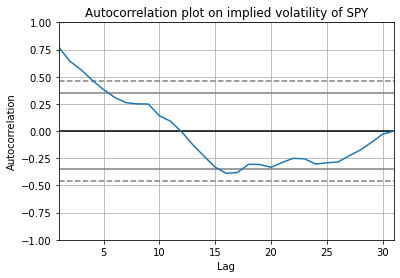

In [7]:
for ticker in [df_searched.ticker.to_numpy()[4]]:
#     print(ticker)
    pd.plotting.autocorrelation_plot(df_vol['Implied Vol_'+ticker])
    plt.title('Autocorrelation plot on implied volatility of '+ticker)
#     features = general_features + [ticker+'_comments']

#     df = compile_option_data(df_1=df_sub, df_2=df_vol, features=features, ticker=ticker, new_attr='Volatility', lag=0)  

# Table of ticker VS mean NLTk or LM

In [8]:
df_searched['mean_NLTK'] = 0
df_searched['mean_NLTK_comments/post'] = 0

df_searched['mean_LM_Positivity'] = 0
df_searched['mean_LM_Positivity_comments/post'] = 0

df_searched['mean_LM_Negativity'] = 0
df_searched['mean_LM_Negativity_comments/post'] = 0

df_searched['mean_LM_Polarity'] = 0
df_searched['mean_LM_Polarity_comments/post'] = 0

df_searched['mean_LM_Subjectivity'] = 0
df_searched['mean_LM_Subjectivity_comments/post'] = 0

for i, ticker in enumerate(df_searched.ticker.to_numpy()):
#     print('Running company: ', ticker)
    temp_df = pd.DataFrame()
    temp_df = df_sub[ df_sub[ticker] == True ]
    
    if len(temp_df) > 0:
        # NLTK
        df_searched['mean_NLTK'].iloc[i] = temp_df['compound'].mean()
        df_searched['mean_NLTK_comments/post'].iloc[i] = temp_df['mean_NLTK_comments'].mean()
        
        # LM dict
        df_searched['mean_LM_Positivity'].iloc[i] = temp_df['LM_Positive'].mean()
        df_searched['mean_LM_Positivity_comments/post'].iloc[i] = temp_df['LM_Positive_comments'].mean()

        df_searched['mean_LM_Negativity'].iloc[i] = temp_df['LM_Negative'].mean()
        df_searched['mean_LM_Negativity_comments/post'].iloc[i] = temp_df['LM_Negative_comments'].mean()

        df_searched['mean_LM_Polarity'].iloc[i] = temp_df['LM_Polarity'].mean()
        df_searched['mean_LM_Polarity_comments/post'].iloc[i] = temp_df['LM_Polarity_comments'].mean()

        df_searched['mean_LM_Subjectivity'].iloc[i] = temp_df['LM_Subjectivity'].mean()
        df_searched['mean_LM_Subjectivity_comments/post'].iloc[i] = temp_df['LM_Subjectivity_comments'].mean()
        
        
# comments VS headlines
df_searched['mean_NLTK_ratio'] = df_searched['mean_NLTK_comments/post'] / df_searched['mean_NLTK']
df_searched['mean_LM_Positivity_ratio'] = df_searched['mean_LM_Positivity_comments/post'] / df_searched['mean_LM_Positivity']
df_searched['mean_LM_Negativity_ratio'] = df_searched['mean_LM_Negativity_comments/post'] / df_searched['mean_LM_Negativity']
df_searched['mean_LM_Polarity_ratio'] = df_searched['mean_LM_Polarity_comments/post'] / df_searched['mean_LM_Polarity']
df_searched['mean_LM_Subjectivity_ratio'] = df_searched['mean_LM_Subjectivity_comments/post'] / df_searched['mean_LM_Subjectivity']

output = r'C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\results\\'
df_searched.to_csv(output+'TableAverageSentimentPerTicker.csv', 
                   index=False
                  )
df_searched

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,ticker,overall_rank,mean_NLTK,mean_NLTK_comments/post,mean_LM_Positivity,mean_LM_Positivity_comments/post,mean_LM_Negativity,mean_LM_Negativity_comments/post,mean_LM_Polarity,mean_LM_Polarity_comments/post,mean_LM_Subjectivity,mean_LM_Subjectivity_comments/post,mean_NLTK_ratio,mean_LM_Positivity_ratio,mean_LM_Negativity_ratio,mean_LM_Polarity_ratio,mean_LM_Subjectivity_ratio
0,GME,1,0.080903,0.026619,0.102439,0.048103,0.185366,0.138283,-0.058537,-5.776873e-02,0.046947,0.024918,0.329020,0.469574,0.745998,0.986883,0.530760
1,AMC,2,0.010356,0.044257,0.091837,0.063086,0.183673,0.141100,-0.091837,-5.138071e-02,0.041663,0.026453,4.273488,0.686938,0.768213,0.559479,0.634944
2,BB,3,0.059823,0.037409,0.062500,0.058769,0.187500,0.060535,-0.066667,4.331678e-03,0.018614,0.016349,0.625337,0.940299,0.322856,-0.064975,0.878325
3,TSLA,4,0.057805,0.037015,0.096045,0.080090,0.225989,0.172741,-0.095103,-5.694471e-02,0.045899,0.035768,0.640348,0.833878,0.764380,0.598766,0.779280
4,SPY,6,0.060131,0.077491,0.136364,0.123127,0.181818,0.287052,-0.032197,-4.501720e-02,0.055255,0.056410,1.288707,0.902935,1.578786,1.398182,1.020899
5,NOK,7,0.000000,0.147070,0.000000,0.300000,0.000000,0.050000,0.000000,1.499999e-01,0.000000,0.094781,inf,inf,inf,inf,inf
6,CLOV,8,0.195957,-0.013058,0.000000,0.032903,0.000000,0.228245,0.000000,-1.676715e-01,0.000000,0.031735,-0.066638,inf,inf,-inf,inf
7,RKT,9,-0.136600,-0.047496,0.000000,0.000000,0.000000,0.083333,0.000000,-8.333325e-02,0.000000,0.018750,0.347700,NaN,inf,-inf,inf
8,WISH,10,0.487774,0.038172,0.074074,0.034273,0.222222,0.175840,-0.135802,-1.195240e-01,0.031766,0.034362,0.078259,0.462685,0.791281,0.880132,1.081704
9,AAPL,11,-0.012879,0.069642,0.071429,0.039278,0.178571,0.094660,-0.107143,-2.388800e-02,0.038988,0.022235,-5.407569,0.549896,0.530094,0.222955,0.570311


# Sentiment analysis bar chart

In [9]:
bearish = ['put', 'sell']
bullish = ['call', 'buy']
keywords = bearish + bullish
keywords  # bearish and bullish keywords

['put', 'sell', 'call', 'buy']

In [10]:
list_sub = []
for word in keywords:
    per_sub = df_sub[word+'_instance'].sum() * 100 / len(df_sub)
    list_sub.append(per_sub)
    print(f'Keyword \033[1m{word}\033[0m is mentioned in {per_sub:.2f}% of the headlines.')
    print(' ')
list_sub

Keyword put is mentioned in 2.39% of the headlines.
 
Keyword sell is mentioned in 1.66% of the headlines.
 
Keyword call is mentioned in 2.85% of the headlines.
 
Keyword buy is mentioned in 4.31% of the headlines.
 


[2.3874732079066443, 1.6551559895213146, 2.8518694927363657, 4.310550130983567]

In [11]:
list_com = []
for word in keywords:
    per_com = df_com[word+'_instance'].sum() * 100 / len(df_com)
    list_com.append(per_com)
    print(f'Keyword \033[1m{word}\033[0m is mentioned in {per_com:.2f}% of the comments.')
    print(' ')
list_com

Keyword put is mentioned in 4.14% of the comments.
 
Keyword sell is mentioned in 2.17% of the comments.
 
Keyword call is mentioned in 4.55% of the comments.
 
Keyword buy is mentioned in 4.39% of the comments.
 


[4.136702135653847, 2.1714422050888977, 4.551227136781039, 4.38966289432947]

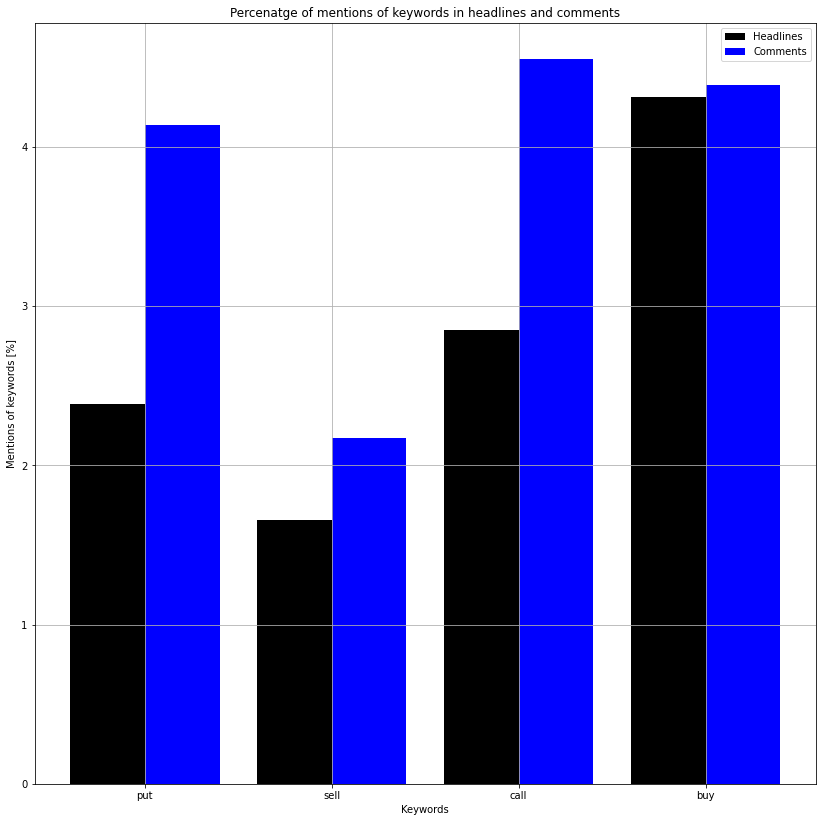

In [12]:
plt.figure(figsize=(14,14))
X_axis = np.arange(len(keywords))
  
plt.bar(X_axis - 0.2, list_sub, 0.4, label = 'Headlines', color='black')
plt.bar(X_axis + 0.2, list_com, 0.4, label = 'Comments', color='blue')
  
plt.xticks(X_axis, keywords)
plt.xlabel("Keywords")
plt.ylabel("Mentions of keywords [%]")
plt.title("Percenatge of mentions of keywords in headlines and comments")
plt.legend()
plt.grid()
plt.show();